# Remove Seasonality - part A

In the previous notebook we applied the differencing to remove the linear and the quadratic trend (by applying respectively one and two times the diff function on the time series). In this notebook, we will look at using the difference transform to remove seasonality.

There are many types of seasonality. Some obvious examples include; time of day, daily, weekly, monthly, annually, and so on. As such, identifying whether there is a seasonality component in your time series problem is subjective.

The simplest approach to determining if there is an aspect of seasonality is to plot and review your data, perhaps at different scales and with the addition of trend lines.

The example below applies the difference() function to a synthetic seasonal dataset. The dataset includes two cycles of 360 units each.

In [1]:
from math import radians, sin
from matplotlib import pyplot as plt

Let's create two functions that we will use, one that perform the difference (like the diff() function in Pandas) and one that performs the exact opposite transformation:

In [2]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

Then we define a dataset with seasonality:

In [3]:
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]

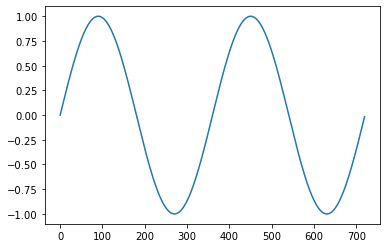

In [4]:
plt.plot(data)
plt.show()

Bein a sine function, this time series has clear cyclical peaks. In this case we already know the period, since we chosen it, and so we can perform the differencing in the same way as we did for detrending. What changes is only the period that we are using, indeed we want to **differencing the data using the period of seasonality**, in this case 360.

In [5]:
# difference the dataset
diff = difference(data, 360)

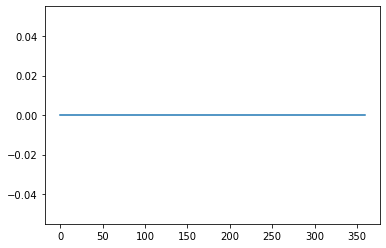

In [6]:
plt.plot(diff)
plt.show()

Being a synthetic data, the residuals after the seasonal difference is 0.

We can also apply the opposite transformation to get back our original data:

In [7]:
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]

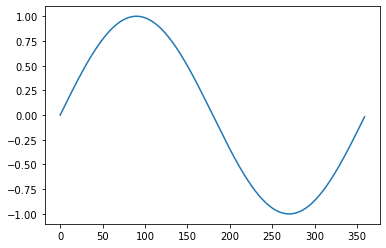

In [8]:
plt.plot(inverted)
plt.show()